In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb

In [2]:
train_dir='../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
from keras.preprocessing import image_dataset_from_directory

training_ds=image_dataset_from_directory(
    train_dir ,
    seed=42 ,
    image_size=(224,224),
    batch_size=64,
    shuffle=True
)

Found 87000 files belonging to 29 classes.


In [3]:
X_test=[]
testing_dir='../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
files=gb.glob(testing_dir+'/*.jpg')
for file in files :
    img=cv2.imread(file)
    X_test.append(list(cv2.resize(img,(224,224))))
    

In [4]:
X_test=np.array(X_test)

In [5]:
X_test.shape

(28, 224, 224, 3)

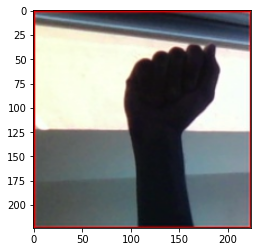

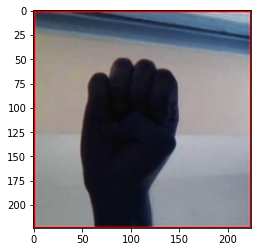

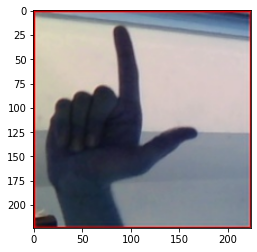

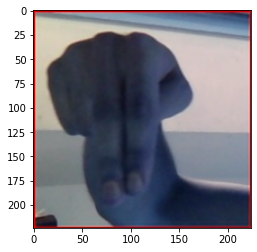

In [6]:
for i in range(4) :
    plt.imshow(X_test[i])
    plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from keras.optimizers import Adam ,RMSprop
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau
from keras.applications import ResNet50

In [8]:
ResNet=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

94773248/94765736 [==============================] - 1s 0us/step


In [9]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)

In [10]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_acc',verbose=2,factor=0.5,min_lr=0.00001)
callback=[EarlyStop , Reduce_LR]

In [11]:
model=Sequential([
    ResNet,
    Flatten(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(29,activation='softmax')
])

In [12]:
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [13]:
history=model.fit(training_ds,epochs=10,batch_size=64, callbacks=callback, verbose=1)

Epoch 1/10
1360/1360 [==============================] - 1033s 747ms/step - loss: 0.4569 - accuracy: 0.8786
Epoch 2/10
1360/1360 [==============================] - 676s 496ms/step - loss: 0.0312 - accuracy: 0.9912
Epoch 3/10
1360/1360 [==============================] - 692s 508ms/step - loss: 0.0198 - accuracy: 0.9944
Epoch 4/10
1360/1360 [==============================] - 705s 517ms/step - loss: 0.0105 - accuracy: 0.9972
Epoch 5/10
1360/1360 [==============================] - 710s 521ms/step - loss: 0.0088 - accuracy: 0.9977
Epoch 6/10
1360/1360 [==============================] - 661s 485ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 7/10
1360/1360 [==============================] - 614s 451ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 8/10
1360/1360 [==============================] - 612s 449ms/step - loss: 0.0063 - accuracy: 0.9985
Epoch 9/10
1360/1360 [==============================] - 609s 447ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 10/10
1360/1360 [======================

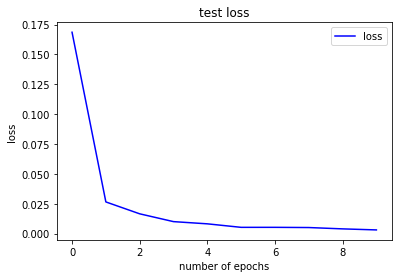

In [14]:
plt.plot(history.history['loss'],color='b',label='loss')
plt.title("test loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred[1].round()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

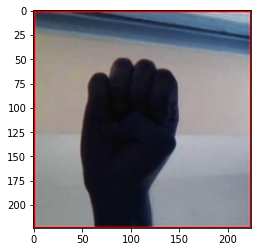

In [17]:
plt.imshow(X_test[1])

In [18]:
model.save('asl_alphabet.h5')